# TD - 1 Discover Neural Network

In [10]:
import jax
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler

In [11]:
# %pip install keras

# Create a Basic Perceptron

In [12]:
SAMPLE = 1000

# Define the color scale
color_scale = [
    [0, "darkblue"],
    [0.5, "white"],
    [1, "darkred"],
]

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# Generate some example data
# loi centre 3 avec variance de 5
GENERATOR = np.random.default_rng(42)
X = GENERATOR.normal(loc=3, scale=5, size=(1000, 2))
true_weights = np.array([0.2, -0.9])
y = np.where(X @ true_weights >= 0, 1, 0)

In [14]:
X = pd.DataFrame(X, columns=["x1", "x2"])
y = pd.DataFrame(y, columns=["target"]).astype(float)

In [15]:
pd.concat([X,y], axis=1)

,x1,x2,target
0,4.523585,-2.199921,1.0
1,6.752256,7.702824,0.0
2,-6.755176,-3.510898,1.0
3,3.639202,1.418787,0.0
4,2.915994,-1.265220,1.0
...,...,...,...
995,4.953625,5.726616,0.0
996,4.158302,7.825852,0.0
997,3.439338,4.960055,0.0
998,4.519187,2.542300,0.0


In [16]:
# Train a Decision tree
linear_regressor = DecisionTreeClassifier()
linear_regressor.fit(X, y)
out = linear_regressor.predict(X)
# transform for binary
out = np.where(out >= 0.5, 1, 0)
out

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,

In [17]:
pd.DataFrame(X)

,x1,x2
0,4.523585,-2.199921
1,6.752256,7.702824
2,-6.755176,-3.510898
3,3.639202,1.418787
4,2.915994,-1.265220
...,...,...
995,4.953625,5.726616
996,4.158302,7.825852
997,3.439338,4.960055
998,4.519187,2.542300


In [18]:
# Plot the distribution of each input using Plotly Express

fig1 = px.histogram(X, x="x1", title="Distribution of Input 1", width=900).show()
fig2 = px.histogram(X, x="x2", title="Distribution of Input 2", width=900).show()
fig3 = px.bar(y["target"].value_counts(), title="Distribution of target", width=900).show()

df_true = pd.DataFrame(X, columns=["x1", "x2"])
df_true["Output"] = y

px.scatter(
    df_true,
    x="x1",
    y="x2",
    color="Output",
    title="Perceptron",
    color_continuous_scale=color_scale,
    width=900,
).show()

## Classic Linear without activation function

In [19]:
# Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
out = linear_regressor.predict(X)
# transform for binary
out = np.where(out >= 0.5, 1, 0)

# Create a DataFrame for linear regression results
df_linear_regression = pd.DataFrame(X, columns=["x1", "x2"])
df_linear_regression["target"] = out


px.scatter(
    df_linear_regression,
    x="x1",
    y="x2",
    color="target",
    title="Régression Linear Classique",
    color_continuous_scale=color_scale,
    width=900,
).show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, out)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

px.imshow(
    conf_matrix_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=color_scale,
    width=900,
    title="Confusion matrix",
).show()

##  Perceptron

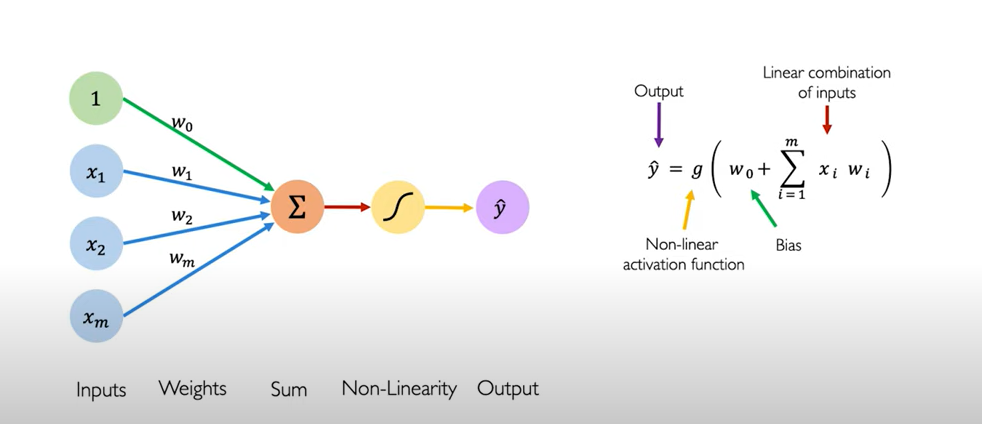

In [20]:
# Scale the data (Crucial for convergence, especially with sigmoid/gradient descent)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add Bias term (intercept) - equivalent to Keras 'use_bias=True'
# We append a column of 1s
X_aug = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

X_df = pd.DataFrame(X, columns=["x1", "x2"]) # Keep original for plotting
y_df = pd.DataFrame(y, columns=["target"]).astype(float)

# Define the perceptron function with activation
def perceptron_with_activation(inputs, weights, activation):
    return activation(np.dot(inputs, weights))

# Training function for the perceptron
def train_perceptron(inputs, labels, learning_rate, epochs, activation):
    weights = np.zeros(inputs.shape[1])
    for epoch in range(epochs):
        for x, label in zip(inputs, labels):
            prediction = perceptron_with_activation(x, weights, activation)
            weights += learning_rate * (label - prediction) * x
    return weights

# Activation function
def linear(x):
    return x

# ou relu
def heaviside(x):
    return np.where(x >= 0, 1, 0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Train the perceptron
learning_rate = 0.01 # Lower LR for stability with scaled data
epochs = 50
activation = sigmoid

# Use Augmented X (with bias) and Scaled features
trained_weights = train_perceptron(X_aug, y_df.values.ravel(), learning_rate, epochs, activation)

# Calculate outputs with trained weights
out = perceptron_with_activation(X_aug, trained_weights, activation)
# transform for binary
out = [1 if x >= 0.5 else 0 for x in out]

# Create a DataFrame for Plotly Express
df_with_trained_weights = X_df.copy()
df_with_trained_weights["target"] = out

# Plot the results using Plotly Express
fig1 = px.scatter(
    df_with_trained_weights,
    x="x1",
    y="x2",
    color="target",
    title="Perceptron (Enhanced with Scaling + Bias)",
    color_continuous_scale=color_scale,
    width=900,
)

fig1.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_df, out)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

px.imshow(
    conf_matrix_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=color_scale,
    width=900,
    title="Confusion matrix",
).show()

In [21]:
# Generate non-linearly separable data

X = GENERATOR.normal(size=(SAMPLE, 2))
y = np.where((X[:, 0] < 0) & (X[:, 1] < 0), 1, 0)
# Create a DataFrame for Plotly Express
df = pd.DataFrame(X, columns=["Input 1", "Input 2"])
df["Output"] = y

# Plot the distribution of each input using Plotly Express
fig1 = px.histogram(df, x="Input 1", title="Distribution of Input 1", width=900).show()
fig2 = px.histogram(df, x="Input 2", title="Distribution of Input 2", width=900).show()
fig3 = px.bar(df["Output"].value_counts(), title="Distribution of target", width=900).show()

df_true = pd.DataFrame(X, columns=["Input 1", "Input 2"])
df_true["Output"] = y

px.scatter(
    df_true,
    x="Input 1",
    y="Input 2",
    color="Output",
    title="Perceptron",
    color_continuous_scale=color_scale,
    width=900,
).show()

In [22]:
# Train a linear regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
out = linear_regressor.predict(X)

# transform for binary
out = [1 if x >= 0.5 else 0 for x in out]

# Create a DataFrame for linear regression results
df_linear_regression = pd.DataFrame(X, columns=["Input 1", "Input 2"])
df_linear_regression["Output"] = out


px.scatter(
    df_linear_regression,
    x="Input 1",
    y="Input 2",
    color="Output",
    title="Régression Linear Classique",
    color_continuous_scale=color_scale,
    width=900,
).show()


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, out)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

px.imshow(
    conf_matrix_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=color_scale,
    width=900,
    title="Confusion matrix",
).show()

In [23]:
# Train the perceptron
learning_rate = 0.01
epochs = 500
activation = sigmoid

trained_weights = train_perceptron(X, y, learning_rate, epochs, activation)

# Calculate outputs with trained weights
out = perceptron_with_activation(X, trained_weights, activation)
# transform for binary
outputs = [1 if x >= 0.5 else 0 for x in out]
# Create a DataFrame for Plotly Express
df_with_trained_weights = pd.DataFrame(X, columns=["Input 1", "Input 2"])
df_with_trained_weights["Output"] = outputs

# Plot the results using Plotly Express
fig1 = px.scatter(
    df_with_trained_weights,
    x="Input 1",
    y="Input 2",
    color="Output",
    title="Perceptron",
    color_continuous_scale=color_scale,
    width=900,
)

fig1.show()

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, outputs)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

px.imshow(
    conf_matrix_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=color_scale,
    width=900,
    title="Confusion matrix",
).show()

# Multi Layer - Feed Forward Network - Artificial Neural Network

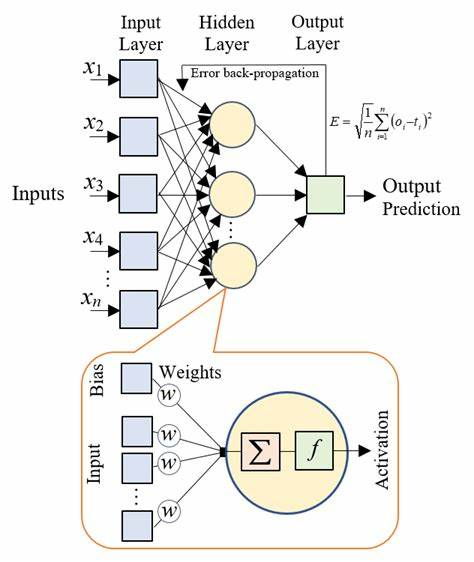

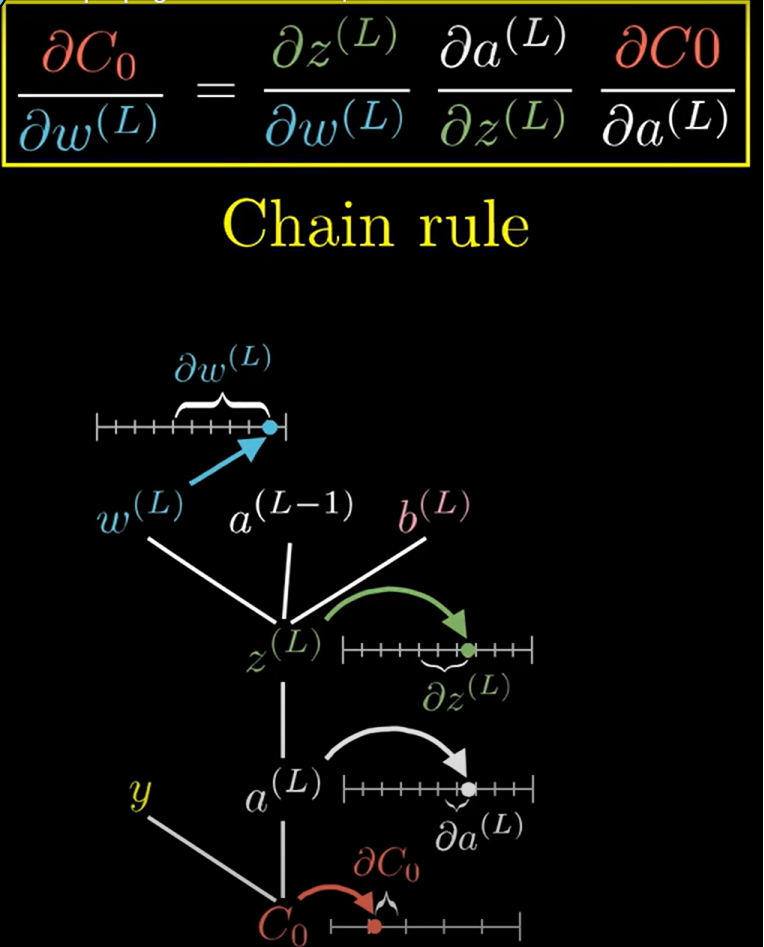

In [24]:
import jax.numpy as np
# Définir la fonction de perte (erreur quadratique moyenne)
@jax.jit
def loss(weights, inputs, targets):
    predictions = forward_mlp(inputs, weights)
    return np.mean((predictions - targets) ** 2)


# Définir la passe avant pour un perceptron multicouche
@jax.jit
def forward_mlp(inputs, weights):
    layer_output = inputs.copy()
    for i in range(len(weights)):
        layer_output = np.dot(layer_output, weights[i])
        layer_output = jax.nn.relu(layer_output) if i < len(weights) - 1 else jax.nn.sigmoid(layer_output)
    return layer_output


# Initialize weights
def initialize_weights(layer_sizes):
    weights = []
    for i in range(len(layer_sizes) - 1):
        weight = GENERATOR.uniform(size=(layer_sizes[i], layer_sizes[i + 1]))
        weights.append(weight)
    return weights


# Initialiser les poids du réseau
layer_sizes = [2, 4, 1]
weights = initialize_weights(layer_sizes)
learning_rate = 0.01


# Calculer le gradient de la fonction de perte
loss_grad = jax.value_and_grad(loss, argnums=(0))

history = []

for epoch in tqdm(range(10000)):

    # Compute the gradients for the minibatch
    value, grad = loss_grad(weights, X, y)
    gradients_w = grad

    # Update weights
    weights = [w - learning_rate * gw for w, gw in zip(weights, gradients_w)]

    # Record the loss for the epoch
    epoch_loss = loss(weights, X, y)
    history.append(epoch_loss)

# Calculer les sorties avec les poids entraînés
out = forward_mlp(X, weights)
# transform for binary
outputs = [1 if x >= 0.5 else 0 for x in out]

# Create a DataFrame for Plotly Express
df_with_trained_weights = pd.DataFrame(X, columns=["Input 1", "Input 2"])
df_with_trained_weights["Output"] = outputs

px.line(history, width=900, markers=True).show()

# Plot the results using Plotly Express
fig1 = px.scatter(
    df_with_trained_weights,
    x="Input 1",
    y="Input 2",
    color="Output",
    title="Perceptron",
    color_continuous_scale=color_scale,
    width=900,
).show()

# transform for binary
outputs = [1 if x >= 0.5 else 0 for x in out]
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, outputs)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

px.imshow(
    conf_matrix_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=color_scale,
    width=900,
    title="Confusion matrix",
).show()

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:41<00:00, 243.70it/s]


# With Python libs : KERAS

In [25]:
# Set JAX as the backend for Keras
import os

os.environ["KERAS_BACKEND"] = "jax"
import jax
import keras

# Define the input layer
inputs = keras.layers.Input(shape=(2,))

# Define the hidden layers
x = keras.layers.Dense(4, activation="relu")(inputs)

# Define the output layer
outputs = keras.layers.Dense(1, activation="sigmoid")(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer="sgd",
    loss="mse",
)

# Summary of the model
model.summary()


# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)

px.line(history.history["loss"], width=900, markers=True).show()

out = model.predict(X)

# transform for binary
outputs = [1 if x >= 0.5 else 0 for x in out]

# Create a DataFrame for Plotly Express
df_with_trained_weights = pd.DataFrame(X, columns=["Input 1", "Input 2"])
df_with_trained_weights["Output"] = outputs

# Plot the results using Plotly Express
fig1 = px.scatter(
    df_with_trained_weights,
    x="Input 1",
    y="Input 2",
    color="Output",
    title="Perceptron",
    color_continuous_scale=color_scale,
    width=900,
).show()

# transform for binary
outputs = [1 if x >= 0.5 else 0 for x in out]
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y, outputs)

# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["True 0", "True 1"], columns=["Predicted 0", "Predicted 1"])

px.imshow(
    conf_matrix_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale=color_scale,
    width=900,
    title="Confusion matrix",
).show()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
